<a href="https://colab.research.google.com/github/cartmarsh/MachineLearning1/blob/main/RNN_Toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [2]:
import os

In [3]:
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 95% 50.0M/52.6M [00:01<00:00, 36.4MB/s]
100% 52.6M/52.6M [00:01<00:00, 35.6MB/s]


In [5]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [6]:
import pandas as pd

In [7]:
raw_df = pd.read_csv("data/train.csv.zip")
test_df = pd.read_csv("data/test.csv.zip")
sub_df = pd.read_csv("data/sample_submission.csv.zip")

In [8]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [10]:
raw_df.sample(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
78873,d314a329a45d6bdc,Panic! at the Disco \n\nBiggest vandal attack ...,0,0,0,0,0,0
52030,8b414c6834491531,why block me editing my talk page? \n\nyou nev...,0,0,0,0,0,0
145573,1edc940b761d95e4,"Jack and Jill \n\nHey jackass, don't protect t...",1,0,1,0,1,0
88722,ed5cc0f54ac22691,"""\n\n SGpedians Home Page \n\nHi Groyn88!\n\nI...",0,0,0,0,0,0
65031,ae002f2a7f340b71,"""\n\nIt was in unbiased faith which might turn...",0,0,0,0,0,0
75405,c9bdf83cd10e5cb1,Strong Support Ivory Coast is the English name...,0,0,0,0,0,0
108479,43f319fd6776a33b,""" New quote & pic\n\n""",0,0,0,0,0,0
39425,6931d04099c406ac,you touth about making,0,0,0,0,0,0
97867,0b963d16a3542721,Elvis pressley was a Wurlitzer singer...Well i...,0,0,0,0,0,0
106781,3b113440adafc5f4,"""\n\n ANI Notice Attempted """"outing"""" of User...",0,0,0,0,0,0


In [11]:
target_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [12]:
target_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [13]:
for col in target_cols:
  print(raw_df[col].value_counts(normalize=True))

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [14]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [15]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [16]:
from torchtext.data.utils import get_tokenizer

In [17]:
tokenizer = get_tokenizer("basic_english")

In [18]:
sample_comment = raw_df.comment_text.values[0]

In [19]:
sample_comment_tokens = tokenizer(sample_comment)

In [20]:
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [21]:
from torchtext.vocab import build_vocab_from_iterator

In [22]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [23]:
VOCAB_SIZE = 1500

In [24]:
## for words that are unknown to the vocab
unk_token = "<unk>"

## to pad sentences, because we need the same length for RNNs
pad_token = "<pad>"

In [25]:
vocab = build_vocab_from_iterator(comment_tokens, specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [26]:
vocab.set_default_index(vocab[unk_token])

In [27]:
vocab["is"]

12

In [ ]:
vocab.lookup_indices(sample_comment_tokens)

### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

In [29]:
MAX_LENGTH = 150

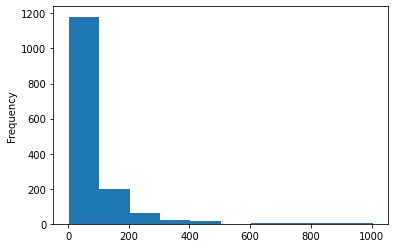

In [30]:
raw_df.comment_text.sample(1500).map(tokenizer).map(len).plot(kind="hist")

In [31]:
from torch.utils.data  import Dataset

In [32]:
def pad_tokens(tokens):
  if(len(tokens) >= MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_token] *( MAX_LENGTH - len(tokens))

In [33]:
import torch

In [92]:
class JigsawDataset(Dataset):
  def __init__(self, df, is_test=False):
    self.df = df
    self.is_test = is_test
    
  
  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index]
    comment_tokens = pad_tokens(tokenizer(comment_text))
    input = torch.tensor(vocab.lookup_indices(comment_tokens))
    if self.is_test:
      target = torch.tensor([0,0,0,0,0,0]).float()
    else:
      target = torch.tensor(self.df[target_cols].values[index]).float()
    return input, target

  def __len__(self):
    return len(self.df)

In [93]:
raw_ds = JigsawDataset(raw_df)

In [94]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [95]:
from torch.utils.data import random_split

In [96]:
VAL_FRAC = 0.25

In [97]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [98]:
len(train_ds)

119679

In [99]:
test_ds = JigsawDataset(test_df, is_test=True)

In [100]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [101]:
from torch.utils.data import DataLoader

In [102]:
BATCH_SIZE = 256

In [103]:
train_dl = DataLoader(train_ds, batch_size= BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [104]:
import torch.nn as nn
import torch.functional as F

In [105]:
vocab[pad_token]

1

In [106]:
emb = nn.Embedding(VOCAB_SIZE, 256, 1)

In [107]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [108]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
import pytorch_lightning as pl

In [110]:
import torch.nn.functional as F

In [111]:
import numpy as np

In [128]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
      super().__init__()
      self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
      self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
      self.linear = nn.Linear(128, 6)
      self.learning_rate = 0.001

    def forward(self, x):
      out = self.emb(x)
      out, hn = self.lstm(out)
      out = F.relu(out[:, -1,:])
      out = self.linear(out)
      return out
    def training_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss

    def validation_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss.item()

    def validation_epoch_end(self, validation_step_outputs):

      loss = np.mean(validation_step_outputs)
      print("Epoch #{}; Loss: {:4f}".format(self.current_epoch, loss))

    def predict_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      return probs

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=self.learning_rate)


In [129]:
model = JigsawModel()

## Train and Evaluate the Model

In [130]:
trainer = pl.Trainer(max_epochs=3, accelerator="gpu", auto_lr_find=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [131]:
trainer.tune(model, train_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00478630092322638
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_c07ffb76-61d5-4aae-a9c9-7477ac659e1d.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_c07ffb76-61d5-4aae-a9c9-7477ac659e1d.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f3c358ad730>}

In [132]:
model.learning_rate

0.00478630092322638

In [133]:
trainer.fit(model, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.701012


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.066304


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.061765


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.060271


## Make Predictions & Submit

In [134]:
test_preds = trainer.predict(model, test_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [136]:
test_preds = torch.cat(test_preds)

In [137]:
test_preds.shape

torch.Size([153164, 6])

In [157]:
test_probs = torch.sigmoid(test_preds)

In [158]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [159]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.727996,0.559141,0.720564,0.512739,0.697087,0.526756
1,0000247867823ef7,0.502299,0.500009,0.500675,0.500090,0.500483,0.500060
2,00013b17ad220c46,0.501758,0.500007,0.500575,0.500067,0.500419,0.500069
3,00017563c3f7919a,0.501014,0.500002,0.500181,0.500037,0.500187,0.500026
4,00017695ad8997eb,0.513491,0.500122,0.503195,0.500404,0.503639,0.500729
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.530608,0.500128,0.504681,0.500848,0.506402,0.500522
153160,fffd7a9a6eb32c16,0.506668,0.500016,0.500826,0.500241,0.501741,0.500372
153161,fffda9e8d6fafa9e,0.503639,0.500011,0.500652,0.500136,0.500873,0.500206
153162,fffe8f1340a79fc2,0.502441,0.500010,0.500518,0.500084,0.500643,0.500121


In [160]:
sub_df.to_csv("submisson.csv", index=None)

In [153]:
sample_df = raw_df.sample(30)

In [154]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
121626,8abf6aec0a13bcf9,"Audi A4\nYOU ARE ASSHOLE, MOTHERFUCKER, SHIT, ...",1,1,1,0,1,0
150910,74118d1fecf15cb5,Interesting that you readily accept sources wh...,0,0,0,0,0,0
75675,ca7bd3821f35dd03,"And furthermore, how long did you spend thinki...",0,0,0,0,0,0
93207,f93b35fa8ce2c434,-) I just put it for the record. I'm fine with...,0,0,0,0,0,0
60856,a2ee2ace5cc553ce,training.oa-bsa.org \n\nI think this would be ...,0,0,0,0,0,0
46250,7b8aa088d4cfe6ca,"Just to clarify, before I move on from this su...",0,0,0,0,0,0
84060,e0f102d394cb12dd,(a highly respected and well known Lincoln Aut...,0,0,0,0,0,0
155773,c36f367e2518e102,""">\n\n I've decided to start an """"article in n...",0,0,0,0,0,0
15799,29b9f3307d959d44,"""\n\n Thank You \n\n Thank You Thanks for rem...",0,0,0,0,0,0
126049,a226925e6446da09,Fuck off you cunt \n\nYou're suck an asshole 1...,1,0,1,0,1,0


In [155]:
sample_ds = JigsawDataset(sample_df)

In [156]:
sample_dl = DataLoader(sample_ds, batch_size=30)

In [163]:
sample_preds = trainer.predict(model, sample_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [164]:
sample_probs = torch.sigmoid(sample_preds[0])

In [170]:
(sample_probs > 0.55).int()

tensor([[1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [166]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
121626,8abf6aec0a13bcf9,"Audi A4\nYOU ARE ASSHOLE, MOTHERFUCKER, SHIT, ...",1,1,1,0,1,0
150910,74118d1fecf15cb5,Interesting that you readily accept sources wh...,0,0,0,0,0,0
75675,ca7bd3821f35dd03,"And furthermore, how long did you spend thinki...",0,0,0,0,0,0
93207,f93b35fa8ce2c434,-) I just put it for the record. I'm fine with...,0,0,0,0,0,0
60856,a2ee2ace5cc553ce,training.oa-bsa.org \n\nI think this would be ...,0,0,0,0,0,0
46250,7b8aa088d4cfe6ca,"Just to clarify, before I move on from this su...",0,0,0,0,0,0
84060,e0f102d394cb12dd,(a highly respected and well known Lincoln Aut...,0,0,0,0,0,0
155773,c36f367e2518e102,""">\n\n I've decided to start an """"article in n...",0,0,0,0,0,0
15799,29b9f3307d959d44,"""\n\n Thank You \n\n Thank You Thanks for rem...",0,0,0,0,0,0
126049,a226925e6446da09,Fuck off you cunt \n\nYou're suck an asshole 1...,1,0,1,0,1,0
